In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
from scipy import optimize
from PIL import Image
from scipy import optimize
from scipy.io import loadmat




In [59]:
data = loadmat('ex5data1.mat')
X=data['X']
y=data['y']

Xval=data['Xval']
yval=data['yval']

Xtest=data['Xtest']
ytest=data['ytest']

Text(0,0.5,'water flowing out of the dam y')

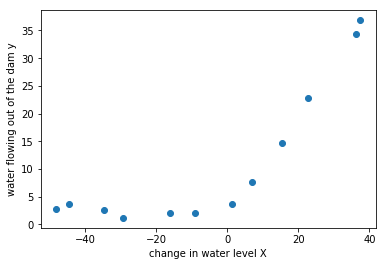

In [60]:
# 1.1 visualize data
plt.scatter(X, y)
plt.xlabel('change in water level X')
plt.ylabel('water flowing out of the dam y')

In [96]:
# 1.2 regularized linear regression cost
# 1.3 regularized linear regression gradient

def cost(X, y, thetas, lmbd):
    m=len(y)
    y_hat = np.hstack((np.ones((X.shape[0],1)), X)).dot(thetas).reshape((m,1))
#     print(y_hat.shape)
    return np.sum((y_hat-y)**2)/(2*m)+lmbd/(2*m)*np.sum(thetas[1]**2)
    
def grad(X, y, thetas, lmbd):
    m=len(y)
    y_hat = np.hstack((np.ones((X.shape[0],1)), X)).dot(thetas).reshape((m,1))
    return np.array([np.sum((y_hat-y))/m, np.sum((y_hat-y)*X)/m + lmbd * thetas[1]/m])

# test cost function: expect cost = 303.933, gradient = [-15.30, 598.250]
print(cost(X, y, [1, 1], 1))
print(grad(X, y, [1, 1], 1))

303.9931922202643
[-15.30301567 598.25074417]


In [99]:
# 1.4 fitting linear regression
def fit_OLS(cost_fn, grad_fn, X, y, lmbd):
    init_thetas=np.array([1,1])
    def F(param): return cost_fn(X, y, param, lmbd)
    def Fprime(param): return grad_fn(X, y, param, lmbd)
    res1 = optimize.fmin_cg(f=F, x0=init_thetas, fprime=Fprime)
    return res1

In [106]:
res = fit_OLS(cost, grad, X, y, 0)
res

Optimization terminated successfully.
         Current function value: 22.373906
         Iterations: 18
         Function evaluations: 28
         Gradient evaluations: 28


array([13.08790734,  0.36777925])

In [115]:
def predict(X_test, solved_thetas):
    X_test=np.hstack((np.ones((X_test.shape[0], 1)), X_test))
    return X_test.dot(solved_thetas)



array([ 7.22669835,  2.36604643, 26.39767248, 26.87675597, -4.58713303,
        9.79942462, 18.71779597,  0.32366284, 13.5988095 , -3.23551868,
       15.66732789, 21.45957412])

Text(0,0.5,'water flowing out of the dam y')

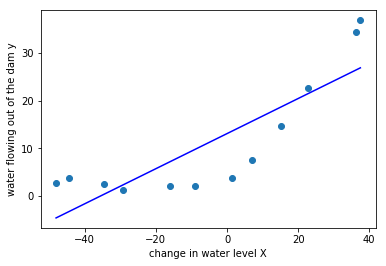

In [130]:
xs=np.linspace(min(X), max(X))
y_hat = predict(xs, res)
plt.scatter(X, y)
plt.plot(xs, y_hat, '-b')
plt.xlabel('change in water level X')
plt.ylabel('water flowing out of the dam y')

In [ ]:
# 2 Bias - variance
# 2.1 Learning curves

